## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold

In [63]:
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

In [154]:
from sklearn.neighbors import KNeighborsRegressor

## Reading the Data and Performing Exploratory Operations

In [3]:
df=pd.read_csv('DS3_C6_S1_Regression_Insurance_Data_Project.csv')

In [4]:
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


#### Checking for null values/noise in data

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df['classif']=df['classif'].fillna(df['classif'].mode()[0])

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# No null values in dataset

In [11]:
# Now checking for noise in data

In [12]:
# Seperating numerical and categorical Data
num_data=df.select_dtypes(include=[np.number])
cat_data=df.select_dtypes(exclude=[np.number])

In [13]:
for col1 in list(cat_data.columns):
    print(round(df[col1].value_counts()))
    print('**********************')

male      676
female    662
Name: sex, dtype: int64
**********************
OB1     395
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64
**********************
no     1064
yes     274
Name: smoker, dtype: int64
**********************
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
**********************


In [14]:
# There is now no null or noise data in our dataset

In [15]:
df['age'].value_counts()

 18     69
 19     67
 50     29
 20     29
 45     29
 48     29
 51     29
 52     29
 47     29
 46     29
 25     28
 22     28
 28     28
 53     28
 21     28
 54     28
 24     28
 26     28
 49     28
 27     28
 23     28
 42     27
 30     27
 41     27
 31     27
 29     27
 44     27
 43     27
 40     27
 56     26
 55     26
 32     26
 34     26
 57     26
 33     25
 39     25
 38     25
 36     25
 35     25
 59     25
 37     25
 58     23
 63     23
 62     23
 60     23
 61     22
 64     22
 0       2
-58      1
 190     1
-1       1
Name: age, dtype: int64

In [16]:
df['age'].mode()[0]

18

In [17]:
df['age'].replace([0,-58,190,-1],df['age'].mode()[0],inplace=True)

In [ ]:
# Replacing noise values in age with mode

#### Performing Necessary Visualizations

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

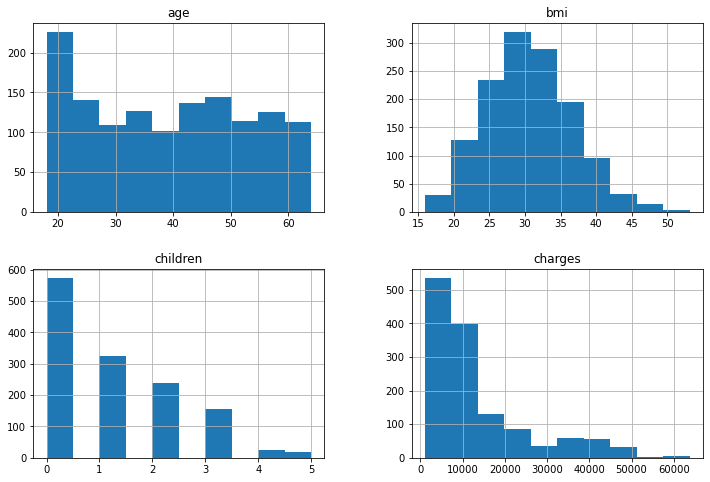

In [18]:
df.hist(figsize=(12,8))

##### From the histogram plots of all numerical data we see that: 
##### 1)only BMI is normally distributed.
##### 2) No. of children for children count gradually decreases
##### 3) Distribution of charges is left skewed 

<AxesSubplot:xlabel='sex', ylabel='count'>

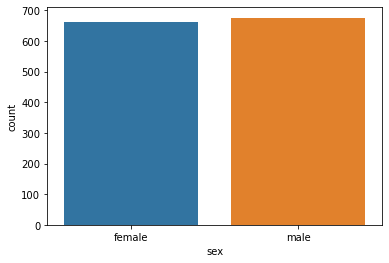

In [19]:
sb.countplot(data=df,x='sex')

In [20]:
# Total number of male and female customers are almost equal

<AxesSubplot:xlabel='sex', ylabel='count'>

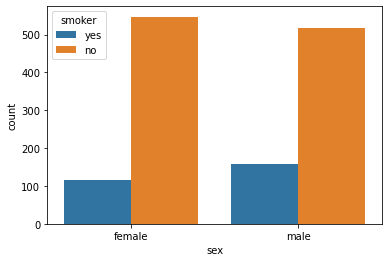

In [21]:
sb.countplot(data=df,x='sex',hue='smoker')

In [22]:
# Smoker count is more amongst male as compared to females

<AxesSubplot:xlabel='classif', ylabel='count'>

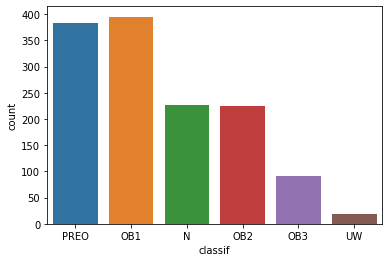

In [23]:
sb.countplot(data=df,x='classif')

In [24]:
# OB1 Class has the highest count followed by PREO and is minimum in UW

<AxesSubplot:xlabel='smoker', ylabel='count'>

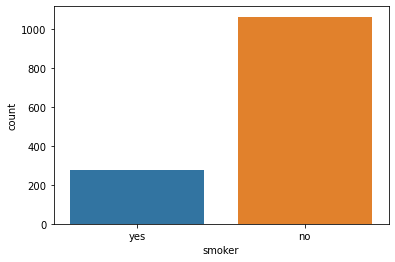

In [25]:
sb.countplot(data=df,x='smoker')

In [26]:
# Most customers are non smokers

<AxesSubplot:xlabel='region', ylabel='count'>

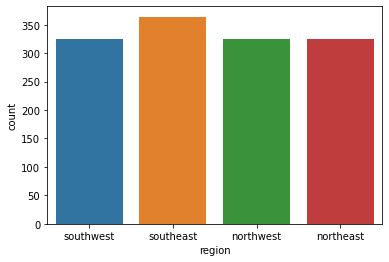

In [27]:
sb.countplot(data=df,x='region')

In [28]:
# Most customers are from the southeast region and is almost equal in other regions

#### Since our business objective requires us to build a model that predicts the insurance policy amount, we are to consider the charges column as our target variable

In [29]:
# Performing visualizations with respect to charges

<AxesSubplot:xlabel='sex', ylabel='charges'>

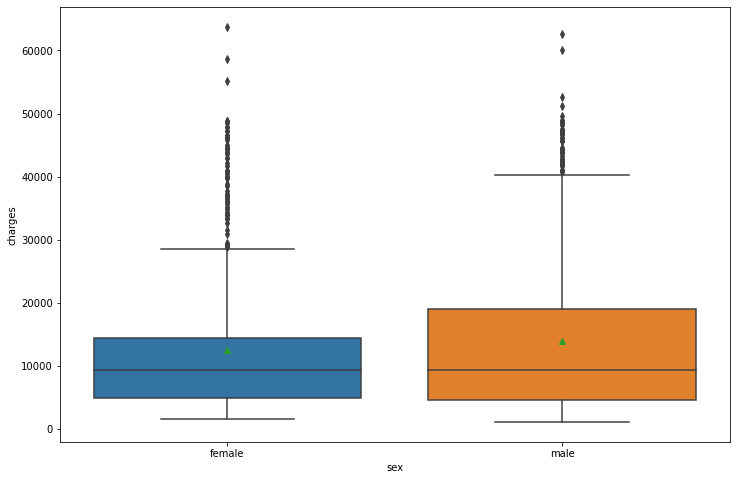

In [30]:
plt.figure(figsize=(12,8))
sb.boxplot(data=df,x='sex',y='charges',showmeans=True)

In [31]:
# Males have a wider range of charges.
# The mean charges amongst males is slightly higher in males but the median charges are approximately the same

<AxesSubplot:xlabel='classif', ylabel='charges'>

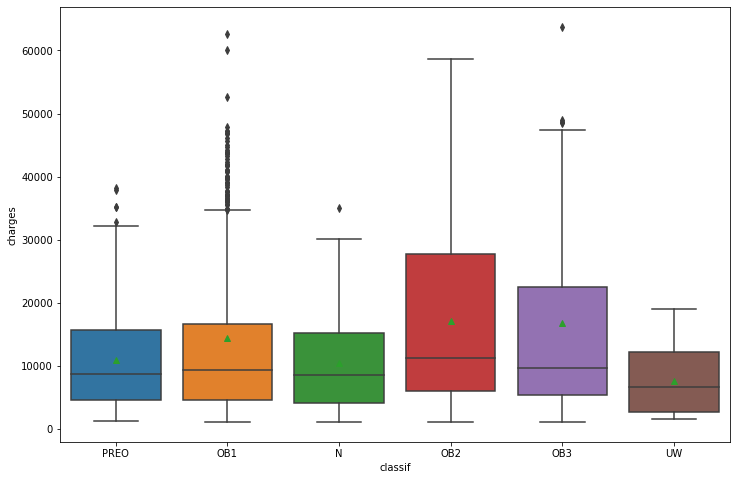

In [32]:
plt.figure(figsize=(12,8))
sb.boxplot(data=df,x='classif',y='charges',showmeans=True)

In [33]:
# OB2 class has the maximum range aswell as the mean for charges
# UW class has the least range with respect to charges
# OB1 class has the maximum outliers with respect to charges

<AxesSubplot:xlabel='smoker', ylabel='charges'>

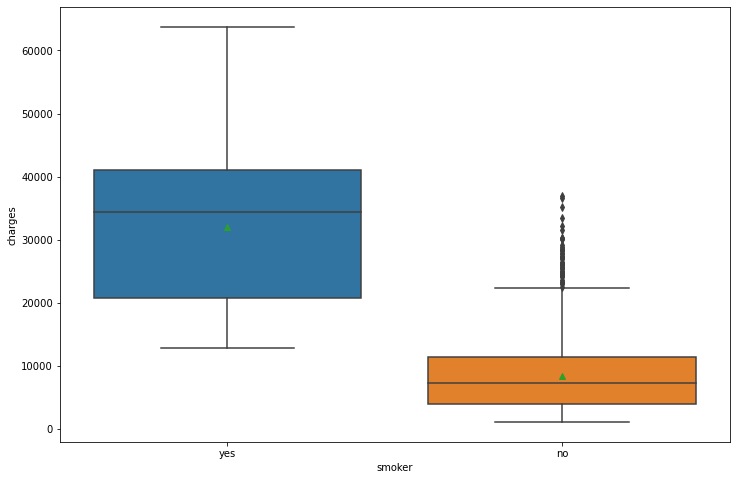

In [34]:
plt.figure(figsize=(12,8))
sb.boxplot(data=df,x='smoker',y='charges',showmeans=True)

In [35]:
# The charges for customers who are smokers is significantly higher compared to non smokers

<AxesSubplot:xlabel='region', ylabel='charges'>

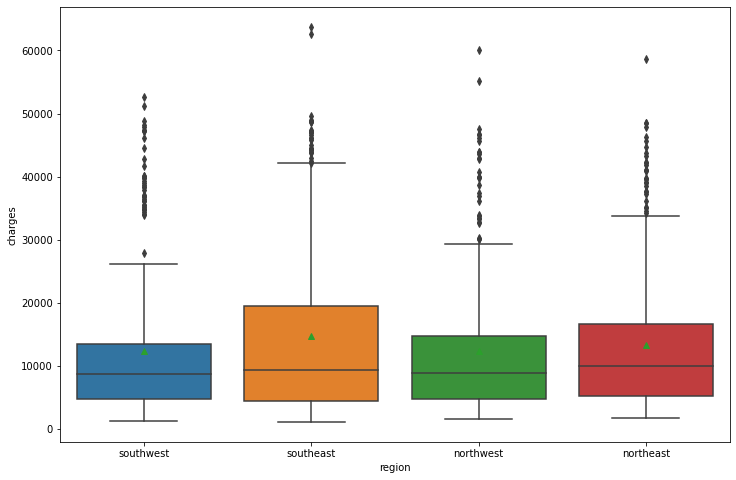

In [36]:
plt.figure(figsize=(12,8))
sb.boxplot(data=df,x='region',y='charges',showmeans=True)

In [37]:
# The southeast region has the maximum range of charges aswell as the maximum mean charges
# The southwest region has the minimum range of chages.

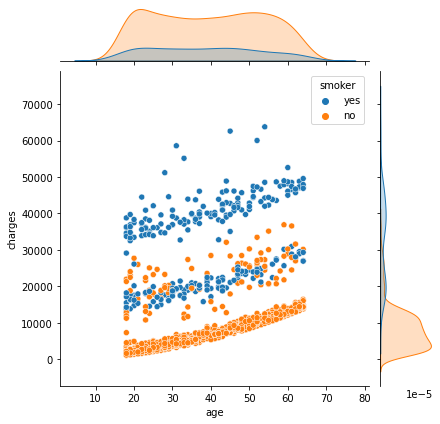

In [38]:
sb.jointplot(data=df,x='age',y='charges',hue='smoker')

In [39]:
# As age increases, the charges tend to increase
# No non smoker exists after charges cross 35000

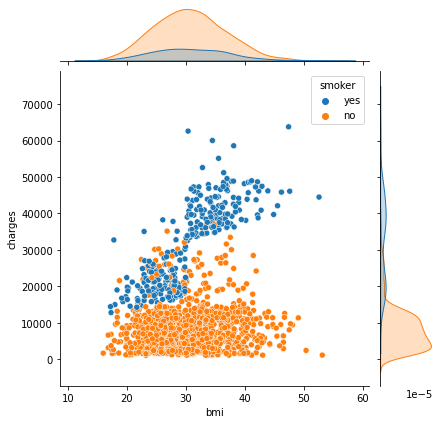

In [40]:
sb.jointplot(data=df,x='bmi',y='charges',hue='smoker')

In [41]:
# as bmi increases charges tend to increase
# As the charges increase more smokers are present

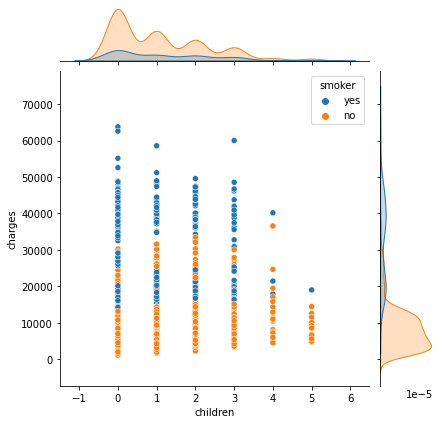

In [42]:
sb.jointplot(data=df,x='children',y='charges',hue='smoker')

In [43]:
# Charges tend to decrease with in crease in children count

In [44]:
# Checking for the data types of the columns

In [45]:
df.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [46]:
# Converting object datatype to categorical

In [47]:
# Creating copy of dataframe
df1=df.copy()

In [48]:
df1['sex']=df1['sex'].astype('category')
df1['classif']=df1['classif'].astype('category')
df1['smoker']=df1['smoker'].astype('category')
df1['region']=df1['region'].astype('category')

In [ ]:
# Encoding the categorical columns

In [49]:
label_encoder=preprocessing.LabelEncoder()

In [50]:
df1['sex']=label_encoder.fit_transform(df1['sex'])
df1['classif']=label_encoder.fit_transform(df1['classif'])
df1['smoker']=label_encoder.fit_transform(df1['smoker'])
df1['region']=label_encoder.fit_transform(df1['region'])

In [52]:
df1.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,0,27.900,4,0,1,3,16884.92400
1,18,1,33.770,1,1,0,2,1725.55230
2,28,1,33.000,1,3,0,2,4449.46200
3,18,1,22.705,0,0,0,1,21984.47061
4,32,1,28.880,4,0,0,1,3866.85520


In [53]:
df1_copy=df1.copy()

In [ ]:
# Finding features that are highly correlated to target variable (charges)

<AxesSubplot:>

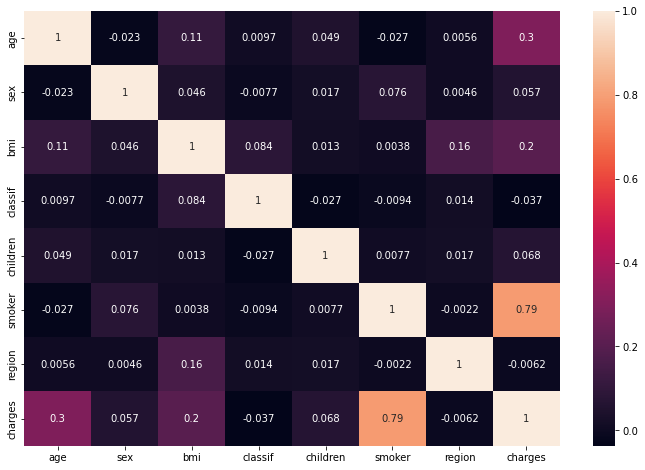

In [59]:
plt.figure(figsize=(12,8))
sb.heatmap(data=df1_copy.corr(),annot=True)

#### Factors affecting the charges the most:
#### 1) Smoker (corr=0.79)
#### 2) Age (corr=0.3)
#### 3) BMI (corr=0.2)

In [54]:
df1.drop('charges',axis=1,inplace=True)

##### Performing scaling on the features

In [153]:
# Since the features are un-uniformly distributed, we perform min-max scaling

In [55]:
scaler=MinMaxScaler()

In [56]:
df_scaled=pd.DataFrame(scaler.fit_transform(df1.to_numpy()),columns=df1.columns)

In [57]:
df_scaled.head()

,age,sex,bmi,classif,children,smoker,region
0,0.021739,0.0,0.321227,0.8,0.0,1.0,1.000000
1,0.000000,1.0,0.479150,0.2,0.2,0.0,0.666667
2,0.217391,1.0,0.458434,0.2,0.6,0.0,0.666667
3,0.000000,1.0,0.181464,0.0,0.0,0.0,0.333333
4,0.304348,1.0,0.347592,0.8,0.0,0.0,0.333333


#### Performing Feature Selection

In [60]:
X=df_scaled[['smoker','age','bmi']]
X.head()

,smoker,age,bmi
0,1.0,0.021739,0.321227
1,0.0,0.000000,0.479150
2,0.0,0.217391,0.458434
3,0.0,0.000000,0.181464
4,0.0,0.304348,0.347592


In [61]:
y=df1_copy[['charges']]
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


#### Splitting data into train set and test set

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

In [ ]:
# Checking shape of train and test dataset

In [65]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((936, 3), (402, 3), (936, 1), (402, 1))

### 1) Performing Linear Regression

In [72]:
model1_train=LinearRegression().fit(x_train,y_train)

In [73]:
coeff_Determ1=model1_train.score(x_train,y_train)

In [74]:
coeff_Determ1  #R^2 (accuracy of the model)

0.7421580944370756

In [78]:
model1_train.intercept_   # intercept (c)

array([-2015.93584927])

In [79]:
model1_train.coef_   # slope (m)

array([[23623.22079835, 12465.73066652, 11832.1826568 ]])

##### Predicting y (label) using Linear Regression

In [82]:
y_predict_LR=model1_train.predict(x_test)

In [83]:
data1=pd.DataFrame()
data1['actual_y']=y_test
data1['predict_y']=y_predict_LR

In [84]:
data1

,actual_y,predict_y
338,41919.09700,35480.546729
620,3659.34600,6150.949505
965,4746.34400,6137.117824
128,32734.18630,25975.781662
329,9144.56500,13799.949240
...,...,...
659,14394.39815,12635.368560
893,44202.65360,36781.249869
584,1242.81600,-236.075797
1290,7133.90250,4674.068351


##### Analysing Error obtained using Linear Regression

In [147]:
MSE1=round(mean_squared_error(y_test,y_predict_LR),2)
MAE1=round(mean_absolute_error(y_test,y_predict_LR),2)
RMSE1=round(mean_squared_error(y_test,y_predict_LR,squared=False),2)
print('Mean Squared Error:',MSE1)
print('Mean Absolute Error:',MAE1)
print('Root Mean Squared Error:',RMSE1)

Mean Squared Error: 35321340.0
Mean Absolute Error: 4128.22
Root Mean Squared Error: 5943.18


### 2) Performing Decision Tree Regression

##### Analysing accuracy of model using Decision Tree Regressor

In [94]:
dtm = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10)
dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_train,y_train)))
dtm.fit(x_test,y_test)
print("R-Squared on test dataset={}".format(dtm.score(x_test,y_test)))

R-Squared on train dataset=0.8651460429158625
R-Squared on test dataset=0.8588925249738686


##### Visualization of Decision Tree

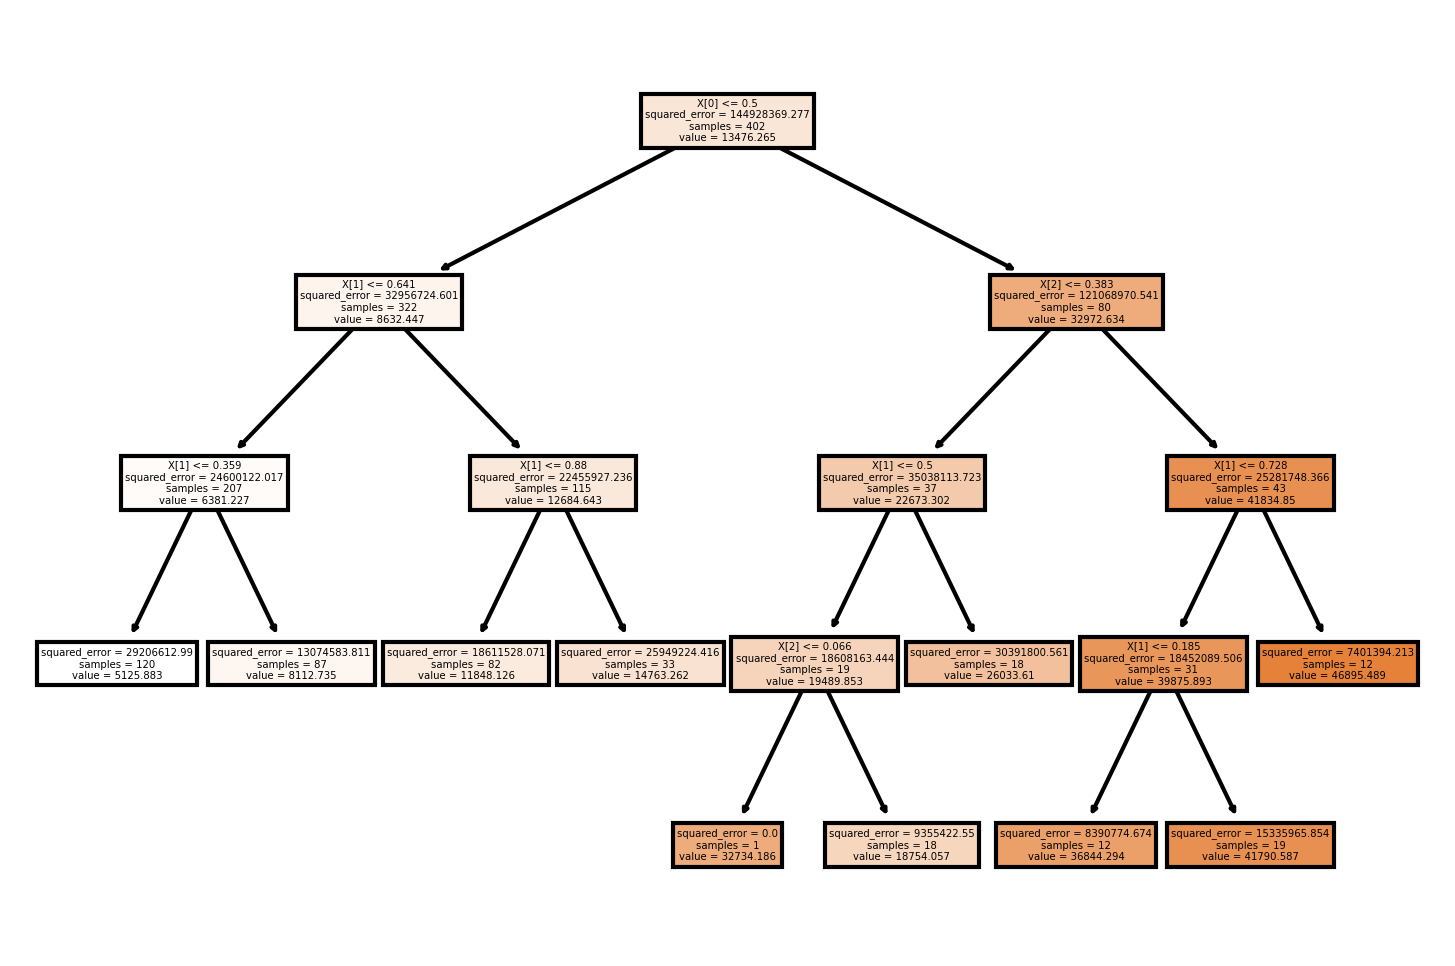

In [97]:
fig, axes = plt.subplots(dpi=300)
tree.plot_tree(dtm, filled = True);

##### Predicting y (label) with decision tree regression

In [98]:
y_predict_DT=dtm.predict(x_test)

In [99]:
data2=pd.DataFrame()
data2['actual_y']=y_test
data2['predict_y']=y_predict_DT

In [100]:
data2

,actual_y,predict_y
338,41919.09700,41790.587314
620,3659.34600,5125.883492
965,4746.34400,8112.734975
128,32734.18630,32734.186300
329,9144.56500,11848.126464
...,...,...
659,14394.39815,11848.126464
893,44202.65360,41790.587314
584,1242.81600,5125.883492
1290,7133.90250,8112.734975


##### Analysing Error obtained using Decision Tree Regression

In [148]:
MSE2=round(mean_squared_error(y_test,y_predict_DT),2)
MAE2=round(mean_absolute_error(y_test,y_predict_DT),2)
RMSE2=round(mean_squared_error(y_test,y_predict_DT,squared=False),2)
print('Mean Squared Error:',MSE2)
print('Mean Absolute Error:',MAE2)
print('Root Mean Squared Error:',RMSE2)

Mean Squared Error: 20450476.25
Mean Absolute Error: 2693.18
Root Mean Squared Error: 4522.22


### 3) Performing Random Forest Regression

In [176]:
rf=RandomForestRegressor()

In [126]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [109]:
# Accuracy score on training Data

In [150]:
rf.score(x_train,y_train)  

0.81204992974906

In [127]:
rf.fit(x_test,y_test)

RandomForestRegressor()

In [ ]:
# Accuracy score on test Data

In [122]:
rf.score(x_test,y_test) 

0.7837662497212484

##### Predicting y (label) using Random Forest Regressor

In [115]:
y_predict_RF=rf.predict(x_test)

In [118]:
data3=pd.DataFrame()
data3['actual_y']=y_test
data3['predict_y']=y_predict_RF

In [119]:
data3

,actual_y,predict_y
338,41919.09700,41977.009647
620,3659.34600,4434.083365
965,4746.34400,7402.783185
128,32734.18630,16261.341187
329,9144.56500,23101.404549
...,...,...
659,14394.39815,11550.129161
893,44202.65360,44116.593849
584,1242.81600,2413.458263
1290,7133.90250,6181.178356


##### Analysing error obtained using Random Forest Regressor Model

In [149]:
MSE3=round(mean_squared_error(y_test,y_predict_RF),2)
MAE3=round(mean_absolute_error(y_test,y_predict_RF),2)
RMSE3=round(mean_squared_error(y_test,y_predict_RF,squared=False),2)
print('Mean Squared Error:',MSE3)
print('Mean Absolute Error:',MAE3)
print('Root Mean Squared Error:',RMSE3)

Mean Squared Error: 31753150.56
Mean Absolute Error: 3235.7
Root Mean Squared Error: 5634.99


### Performing KNN Regression

In [156]:
model_knn=KNeighborsRegressor(5)
model_knn.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
# Testing accuracy on train dataset

In [157]:
model_knn.score(x_train,y_train)

0.8904785906144609

In [159]:
model_knn.fit(x_test,y_test)

KNeighborsRegressor()

In [ ]:
# Testing accuracy on test dataset

In [160]:
model_knn.score(x_test,y_test) 

0.8696213326423864

##### Predicting y (label) with KNN regression

In [161]:
y_predict_KNN=model_knn.predict(x_test)

In [162]:
data4=pd.DataFrame()
data4['actual_y']=y_test
data4['predict_y']=y_predict_KNN

In [163]:
data4

,actual_y,predict_y
338,41919.09700,42261.64200
620,3659.34600,4344.66126
965,4746.34400,5137.50711
128,32734.18630,20287.40728
329,9144.56500,10370.29460
...,...,...
659,14394.39815,12217.22285
893,44202.65360,43631.50346
584,1242.81600,2079.70868
1290,7133.90250,6657.39093


##### Analysing error obtained while using KNN regression

In [164]:
MSE4=round(mean_squared_error(y_test,y_predict_KNN),2)
MAE4=round(mean_absolute_error(y_test,y_predict_KNN),2)
RMSE4=round(mean_squared_error(y_test,y_predict_KNN,squared=False),2)
print('Mean Squared Error:',MSE4)
print('Mean Absolute Error:',MAE4)
print('Root Mean Squared Error:',RMSE4)

Mean Squared Error: 18895567.65
Mean Absolute Error: 2613.68
Root Mean Squared Error: 4346.9


#### Comparing Linear Regression, Decision Tree Regression and Random Forest Regression Models

In [172]:
df_compare=pd.DataFrame()

In [173]:
df_compare['Model']=['Linear Regression','Decision Tree Regression','Random Forest Regression','KNN Regression']
df_compare['Features']=['Smoker, Age, BMI','Smoker, Age, BMI','Smoker, Age, BMI','Smoker, Age, BMI']
df_compare['Label']=['Charges','Charges','Charges','Charges']
df_compare['MSE']=[MSE1,MSE2,MSE3,MSE4]
df_compare['MAE']=[MAE1,MAE2,MAE3,MAE4]
df_compare['RMSE']=[RMSE1,RMSE2,RMSE3,RMSE4]
df_compare['R^2']=[round(coeff_Determ1,2),round(dtm.score(x_train,y_train),2),round(rf.score(x_train,y_train),2),round(model_knn.score(x_train,y_train),2)]

In [174]:
df_compare

,Model,Features,Label,MSE,MAE,RMSE,R^2
0,Linear Regression,"Smoker, Age, BMI",Charges,35321340.00,4128.22,5943.18,0.74
1,Decision Tree Regression,"Smoker, Age, BMI",Charges,20450476.25,2693.18,4522.22,0.84
2,Random Forest Regression,"Smoker, Age, BMI",Charges,31753150.56,3235.70,5634.99,0.81
3,KNN Regression,"Smoker, Age, BMI",Charges,18895567.65,2613.68,4346.90,0.81


#### Conclusions:
#### 1) Linear regression accounted for the maximum error with a R^2 value of 0.74
#### 2) Random Forest Regression and KNN Regression had less error compared to Linear Regression and had a better R^2 value of 0.81
#### 3) Decision Tree Regression had the best R^2 value of 0.84
#### Therefore Decision Tree model gave us the best predictions followed by Random Forest Regression and lastly the Linear Regression model